In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly.figure_factory as ff
import umap # use 'pip install umap-learn' or 'conda install -c conda-forge umap-learn'

In [ ]:
# Importing dataset and examining it
dataset = pd.read_csv("/content/Sales_Transactions_Dataset_Weekly.csv")
# print(dataset.head())
# print(dataset.shape)
dataset.info()
dataset= dataset.iloc[:,:53]
# print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


In [ ]:
# Defining feature set
X = dataset.drop(['Product_Code'], axis = 1) # Features
print(type(X))
print(X.shape)


<class 'pandas.core.frame.DataFrame'>
(811, 52)


In [ ]:


# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [ ]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_components = 2, n_neighbors=15, min_dist=0.4)
x_umap = u.fit_transform(X_scaled)

ProductCode=list(dataset['Product_Code'])
data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                                text=[f'Product_Code: {a}' for a in ProductCode],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
# Implementing PCA to visualize dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))
ProductCode=list(dataset['Product_Code'])
data = [go.Scatter(x=x_pca[:,0], y=x_pca[:,1], mode='markers',
                    marker = dict(color=None, colorscale='Rainbow', opacity=0.5),
                                text=[f'Product_Code: {a}' for a in ProductCode],
                                hoverinfo='text')]

layout = go.Layout(title = 'PCA Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Principal Component'),
                    yaxis = dict(title='Second Principal Component'))
fig = go.Figure(data=data, layout=layout)
fig.show()

Variance explained by each of the n_components:  [0.91902118 0.01061791]
Total variance explained by the n_components:  0.9296390897489929


In [ ]:
# Labelling clusters using KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x_umap)

labels = list(kmeans.labels_)
data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Product_Code: {a}<br>Label: {b}' for a,b in list(zip(ProductCode,labels))],
                                hoverinfo='text')]

layout = go.Layout(title = 'K-Means Clustering', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

dataset['Label'] = kmeans.labels_
dataset.to_csv("Sales_Transactions_Clustered.csv", index=False)
print(dataset.Label.value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Label
1    295
3    198
0    140
2    120
4     58
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons

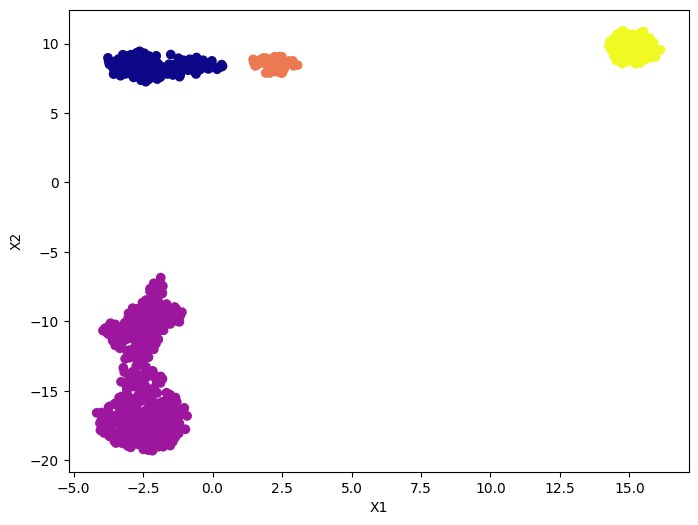

In [ ]:
# Implementing DBSCAN
dbscan = DBSCAN(eps= 1, min_samples=4)
dbscan.fit(x_umap)
plt.figure(figsize = (8,6))
plt.scatter(x=x_umap[:,0], y=x_umap[:,1], c=dbscan.labels_, cmap='plasma')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()